<a href="https://colab.research.google.com/github/Jay-5051/Data-Analysis/blob/master/Lasso%2C_Ridge%2C_ElasticNet_and_Column_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
startups = pd.read_csv("50_Startups.csv")

In [ ]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
RDSpend           48 non-null float64
Administration    50 non-null float64
MarketingSpend    47 non-null float64
State             50 non-null object
Profit            50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
startups.dropna(inplace=True)

In [ ]:
X = startups.drop('Profit', axis=1).values
print(X.shape)
X[0:3,:]
y = startups['Profit'].values
print(y.shape)

(46, 4)
(46,)


In [ ]:
from sklearn.preprocessing import LabelEncoder 
Le = LabelEncoder()
X[:,3] = Le.fit_transform(X[:,3])
X[0:3,:]

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1]], dtype=object)

In [ ]:
Le.inverse_transform([0])

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [('ohe', OneHotEncoder(categories='auto'), [3])],
    remainder='passthrough'
    )
X = ct.fit_transform(X)

print(X.shape)

print(X[0:3,:])

(46, 6)
[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]]


### Lasso feature importance

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y, 
                                                  test_size=0.2, 
                                                  random_state=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9443805044678084

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
reg = LassoCV()
reg.fit(X_train, y_train)
print(reg.alpha_)
print(reg.score(X_test, y_test))

3234061.2331898934
0.9399946218705578


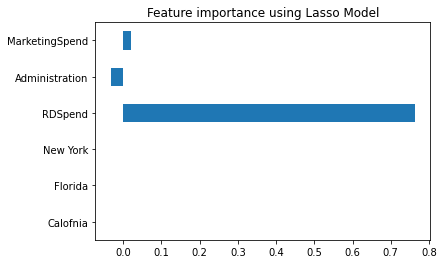

In [ ]:
imp_coef = pd.Series(reg.coef_, index=['Calofnia', 'Florida', 'New York','RDSpend', 
                                       'Administration', 'MarketingSpend'])
#imp_coef = imp_coef.sort_values()
imp_coef.plot(kind='barh')
plt.title("Feature importance using Lasso Model")
plt.show()

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [ ]:
model = Lasso(alpha=500)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.941545790490371

In [ ]:
model.coef_

array([ 0.        , -0.        , -0.        ,  0.76816938, -0.0392113 ,
        0.02008181])

In [ ]:
model = Ridge(alpha=500)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9416239062414125

In [ ]:
model = ElasticNet(alpha=500,l1_ratio=0.5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9415458332557453